# Degree Analysis

In [2]:
import snap
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
def genErdosRenyi(G):
    """
    G: Graph to generate Erdos Renyi graph based on its properties

    return type: snap.PUNGraph
    return: Erdos-Renyi graph with N nodes and E edges
    """
    N = G.GetNodes()
    E = G.GetEdges()

    Graph = snap.TUNGraph.New()
    for i in range(N):
        Graph.AddNode(i)
        
    i = 0
    while i < E:
        edge = (np.random.randint(0, E), np.random.randint(0, E))
        if Graph.IsNode(edge[0]) and Graph.IsNode(edge[1]):
            if not Graph.IsEdge(edge[0], edge[1]) and edge[0] != edge[1]:
                Graph.AddEdge(edge[0], edge[1])
                i += 1

    # print "Erdos edges: {}".format(Graph.GetEdges())
    # print "Erdos nodes: {}".format(Graph.GetNodes())
    return Graph


In [5]:
def getDataPointsToPlot(Graph):
    """
    :param - Graph: snap.PUNGraph object representing an undirected graph

    return values:
    X: list of degrees
    Y: list of frequencies: Y[i] = fraction of nodes with degree X[i]
    """
    X, Y = [], []
    deg = [node.GetDeg() for node in Graph.Nodes()]
    X = [i for i in range(max(deg))]
    Y = [float(deg.count(i))/Graph.GetNodes() for i in X]
    X,Y = zip(*[(x,y) for x,y in zip(X,Y) if y > 0])
    return X, Y

In [6]:
G_LS174t = snap.LoadEdgeList(snap.PNEANet, "../data/Edgelist/LS174T_clean_EdgesList.txt", 0, 1)
G_SW1222 = snap.LoadEdgeList(snap.PNEANet, "../data/Edgelist/SW1222_clean_EdgesList.txt", 0, 1)
G_Mes    = snap.LoadEdgeList(snap.PNEANet, "../data/Edgelist/Mesentery_clean_EdgeList.txt", 0, 1)
X_LS174T, Y_LS174T = getDataPointsToPlot(G_LS174t)
X_SW1222, Y_SW1222 = getDataPointsToPlot(G_SW1222)
X_Mes, Y_Mes = getDataPointsToPlot(G_Mes)

In [7]:
#Erdos graph for LS174t
G_ER_LS = genErdosRenyi(G_LS174t)
X_ER_LS, Y_ER_LS = getDataPointsToPlot(G_ER_LS)

#Erdos graph for SW1222
G_ER_SW = genErdosRenyi(G_SW1222)
X_ER_SW, Y_ER_SW = getDataPointsToPlot(G_ER_SW)

#Erdos graph for Mesentery
G_ER_Mes = genErdosRenyi(G_Mes)
X_ER_Mes, Y_ER_Mes = getDataPointsToPlot(G_ER_Mes)

## Degree Distribution Plots

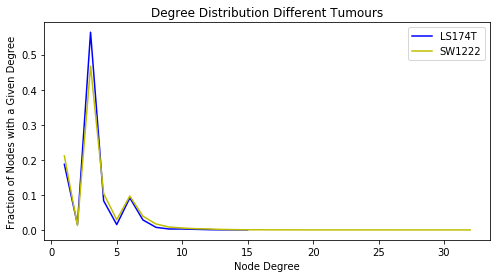

In [13]:
plt.plot(X_LS174T, Y_LS174T, color = 'b', label = 'LS174T')
plt.plot(X_SW1222, Y_SW1222, color = 'y', label = 'SW1222')
plt.xlabel('Node Degree')
plt.ylabel('Fraction of Nodes with a Given Degree')
plt.title('Degree Distribution Different Tumours')
plt.legend()
plt.gcf().set_figheight(4)
plt.gcf().set_figwidth(8)
plt.savefig("tumour_deg_dist.pdf")
plt.show()

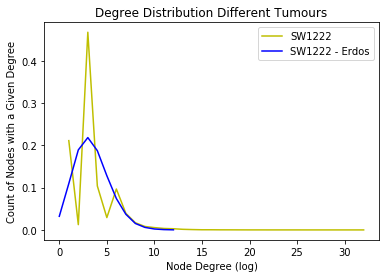

In [7]:
plt.plot(X_SW1222, Y_SW1222, color = 'y', label = 'SW1222')
plt.plot(X_ER_SW, Y_ER_SW, color = 'b', label = 'SW1222 - Erdos')
plt.xlabel('Node Degree (log)')
plt.ylabel('Count of Nodes with a Given Degree')
plt.title('Degree Distribution Different Tumours')
plt.legend()
plt.show()

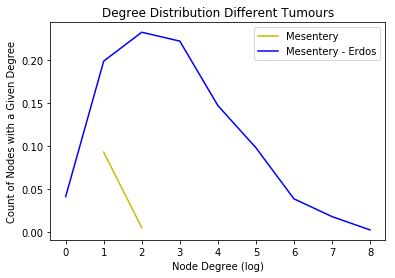

In [8]:
plt.plot(X_Mes, Y_Mes, color = 'y', label = 'Mesentery')
plt.plot(X_ER_Mes, Y_ER_Mes, color = 'b', label = 'Mesentery - Erdos')
plt.xlabel('Node Degree (log)')
plt.ylabel('Count of Nodes with a Given Degree')
plt.title('Degree Distribution Different Tumours')
plt.legend()
plt.show()

# Clustering Coefficient

In [17]:
print('Clustering Coeff of LS147t : %.9f' % snap.GetClustCf(G_LS174t))
print('Clustering Coeff of SW1222 : %.9f' % snap.GetClustCf(G_SW1222))
print('Clustering Coeff of Mesentery : %.9f' % snap.GetClustCf(G_Mes))
print('Clustering Coeff of LS147t_ER : %.9f' % snap.GetClustCf(G_ER_LS))
print('Clustering Coeff of SW1222_ER : %.9f' % snap.GetClustCf(G_ER_SW))
print('Clustering Coeff of Mesentery : %.9f' % snap.GetClustCf(G_ER_Mes))

Clustering Coeff of LS147t : 0.029383634
Clustering Coeff of SW1222 : 0.031099244
Clustering Coeff of Mesentery : 0.037800687
Clustering Coeff of LS147t_ER : 0.000141070
Clustering Coeff of SW1222_ER : 0.000076299
Clustering Coeff of Mesentery : 0.001718213


In [21]:
print "LS MxWcc"
snap.GetMxScc(G_SW1222).GetNodes(), G_SW1222.GetNodes()

LS MxWcc


(11, 72084)

In [19]:
print "Erdoes-LS MxWcc"
snap.GetMxWcc(G_ER_LS).GetNodes(), G_ER_LS.GetNodes()

Erdoes-LS MxWcc


(17223, 18093)

In [26]:
#Get Avg node deg
def getAvgNodeDeg(G):
    return float(sum([node.GetDeg() for node in G.Nodes()]))/G.GetNodes()

In [27]:
print('Avg node Deg of LS147t : %.9f' % getAvgNodeDeg(G_LS174t))
print('Avg node Deg of SW1222 : %.9f' % getAvgNodeDeg(G_SW1222))
print('Avg node Deg of Mesentery : %.9f' % getAvgNodeDeg(G_Mes))

Avg node Deg of LS147t : 3.208975847
Avg node Deg of SW1222 : 3.444814383
Avg node Deg of Mesentery : 2.809278351
